In [2]:
import numpy as np
import pandas as pd
import textstat as ts

# make sure you have the blurbs stitched before running 
df_joined = pd.read_csv("../Data/Cleaned/joined_data.csv")

# ~25 min to run
df_joined['flesch readability'] = df_joined.apply(lambda x: ts.flesch_reading_ease(x['blurb']), axis=1)
df_joined['FK grade'] = df_joined.apply(lambda x: ts.flesch_kincaid_grade(x['blurb']), axis=1)
df_joined['fog'] = df_joined.apply(lambda x: ts.gunning_fog(x['blurb']), axis=1)
df_joined['smog'] = df_joined.apply(lambda x: ts.smog_index(x['blurb']), axis=1)
df_joined['automated readability'] = df_joined.apply(lambda x: ts.automated_readability_index(x['blurb']), axis=1)
df_joined['CL index'] = df_joined.apply(lambda x: ts.coleman_liau_index(x['blurb']), axis=1)
df_joined['linsear write'] = df_joined.apply(lambda x: ts.linsear_write_formula(x['blurb']), axis=1)
df_joined['DC readability'] = df_joined.apply(lambda x: ts.dale_chall_readability_score(x['blurb']), axis=1)
df_joined['grade consensus'] = df_joined.apply(lambda x: ts.text_standard(x['blurb'], float_output=True), axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc078b9c8b0>,
      dtype=object)

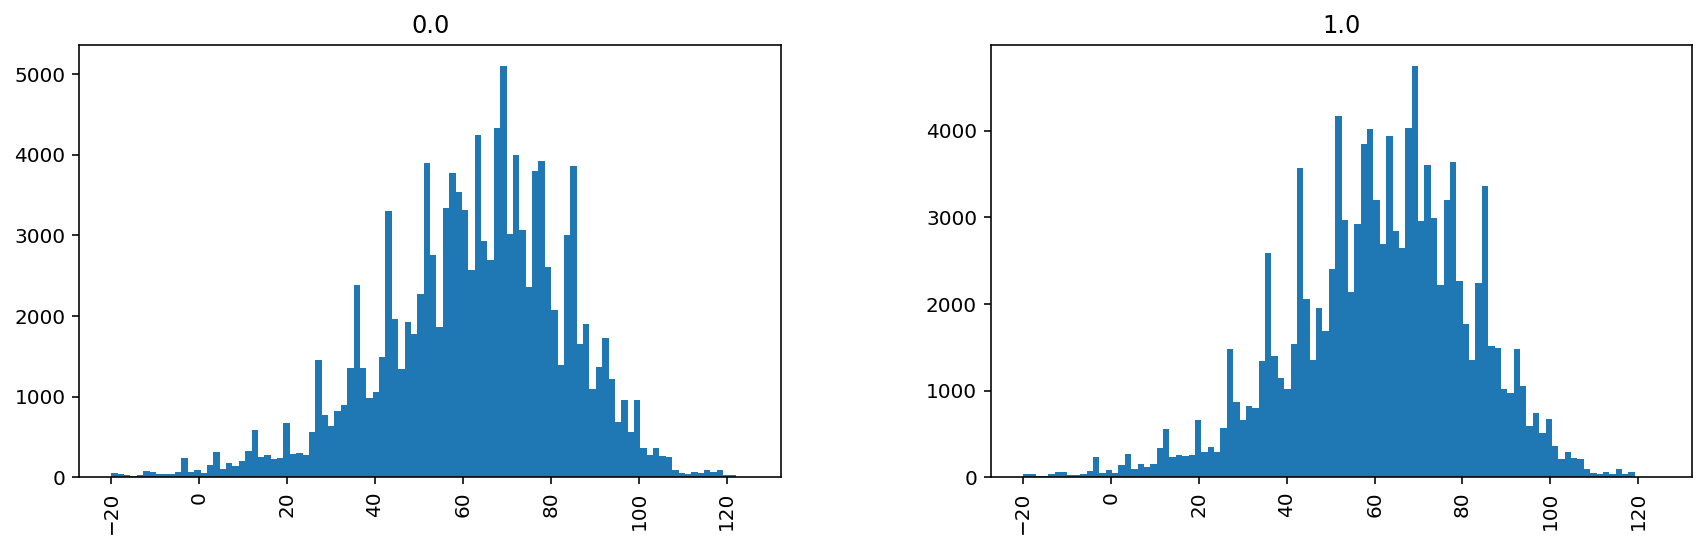

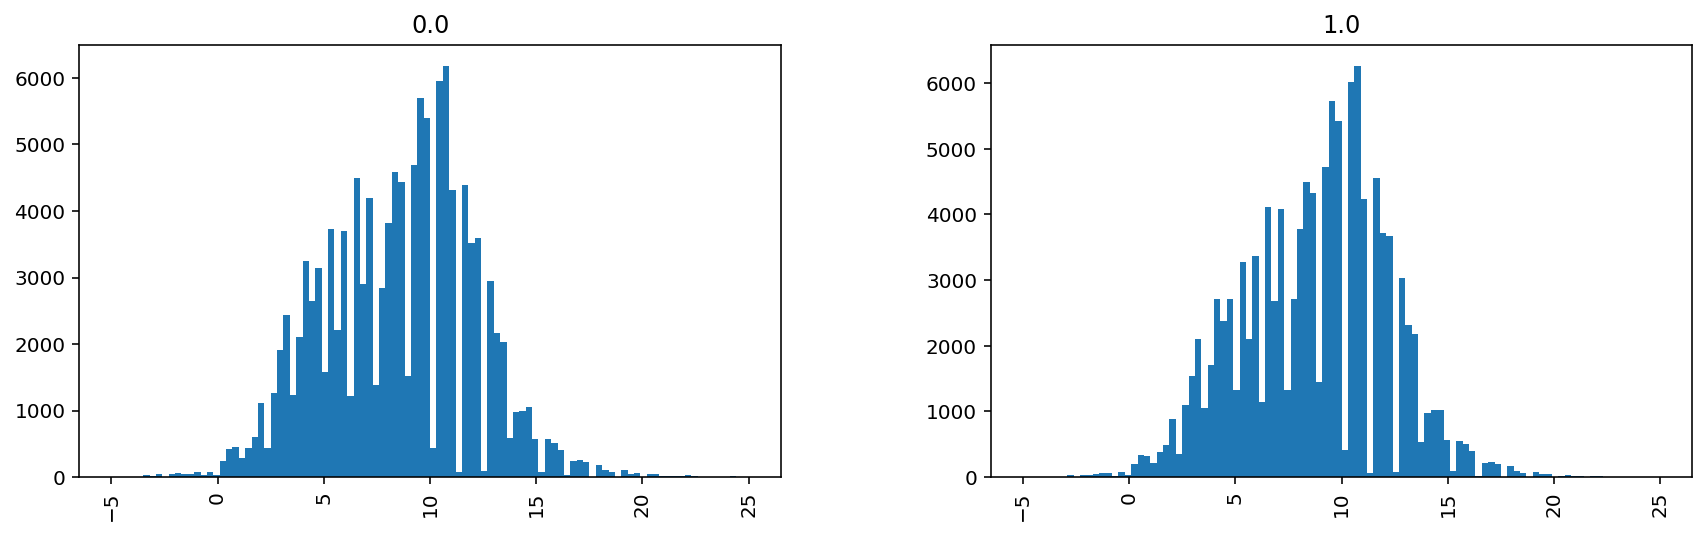

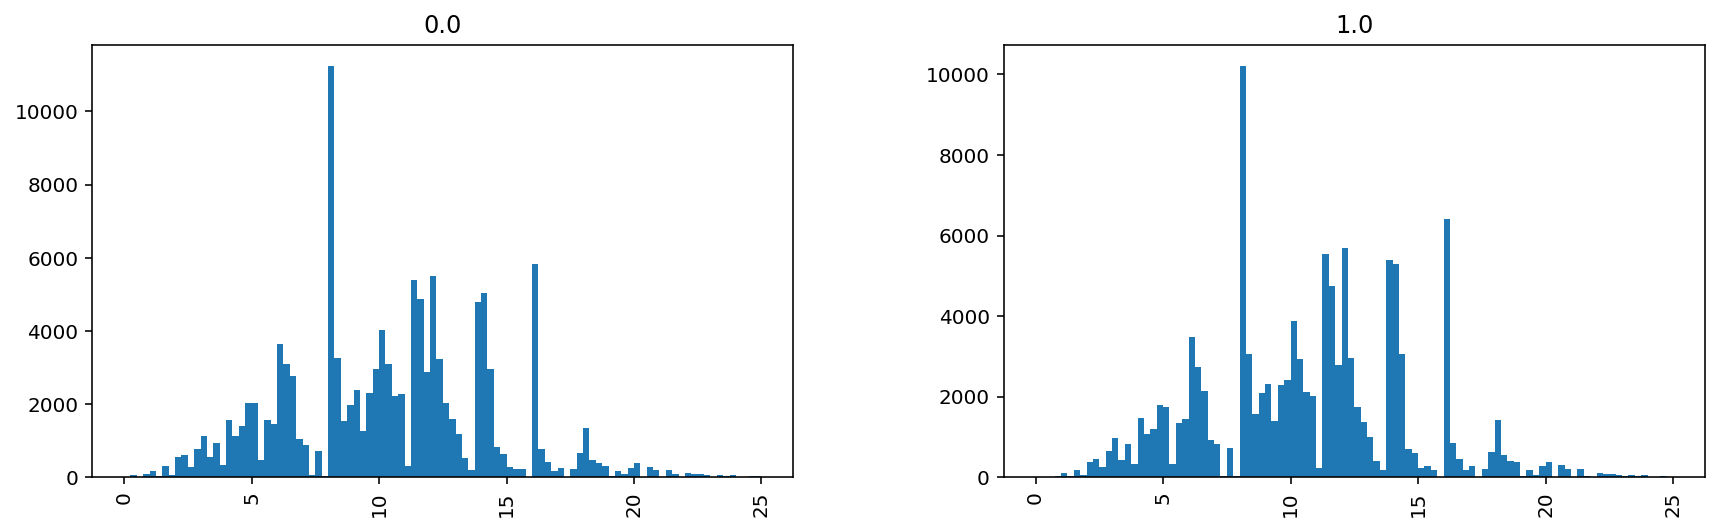

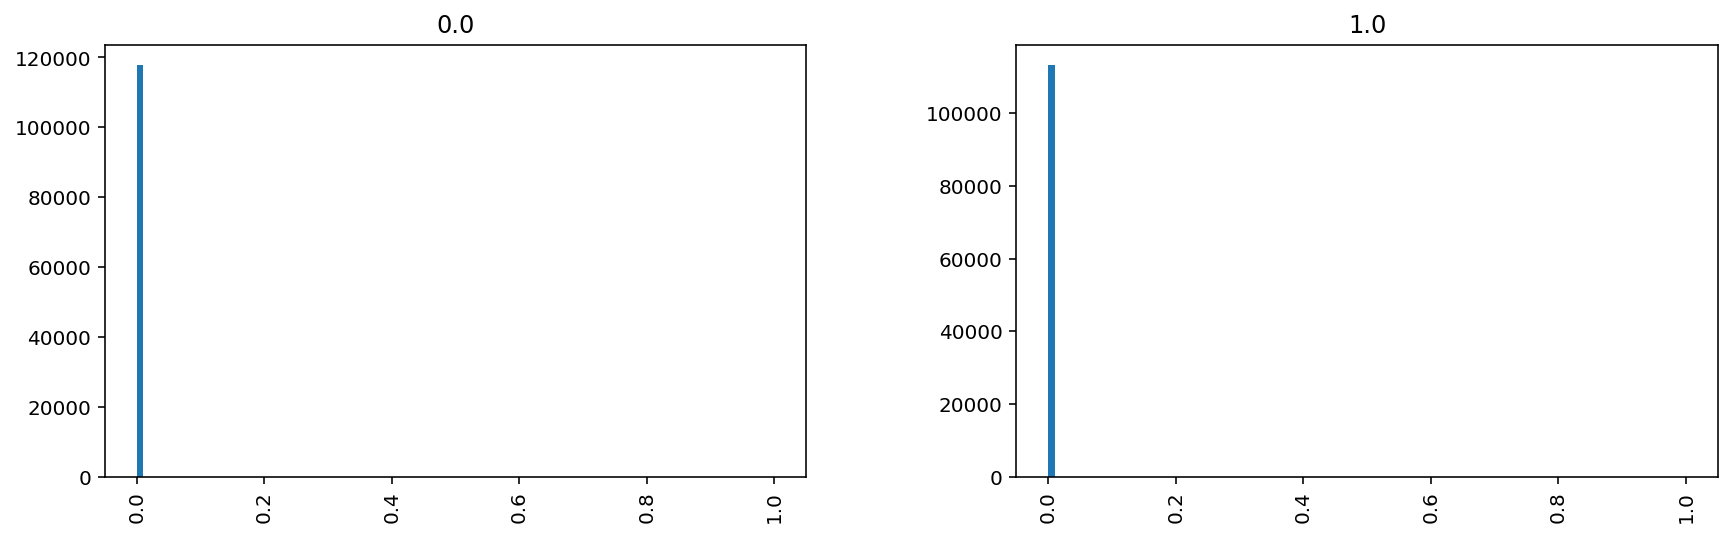

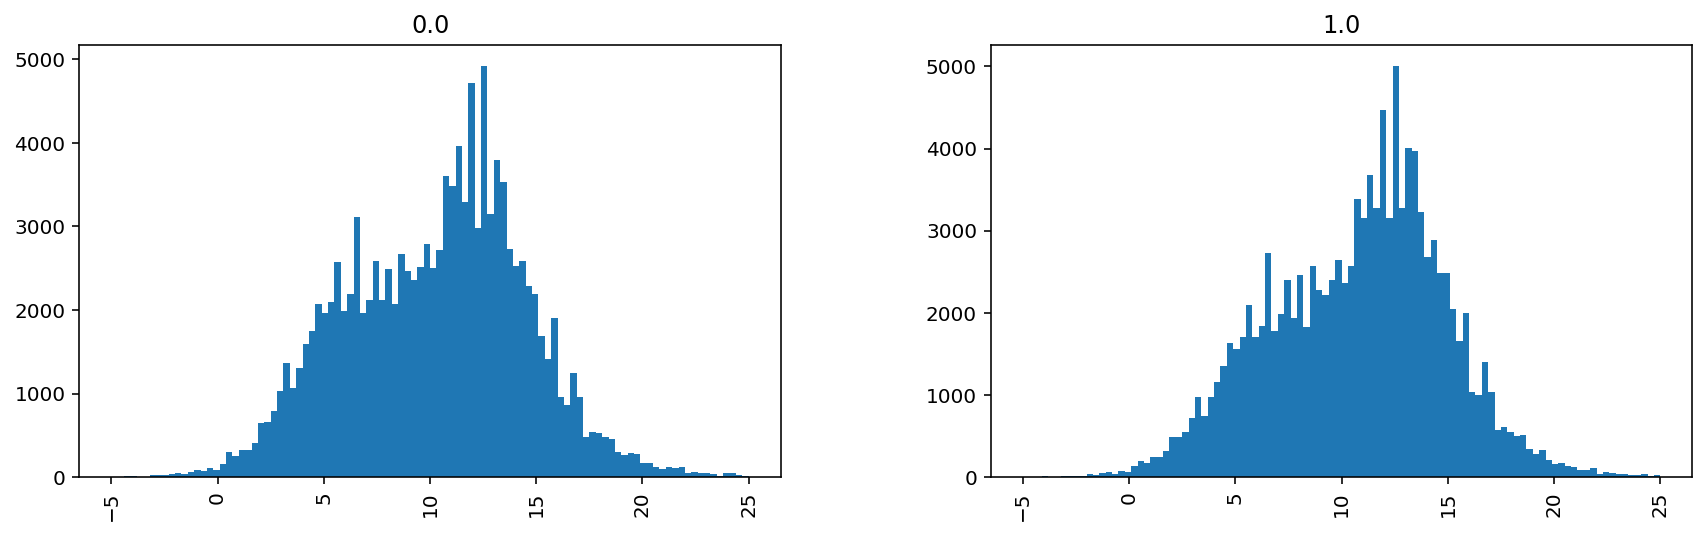

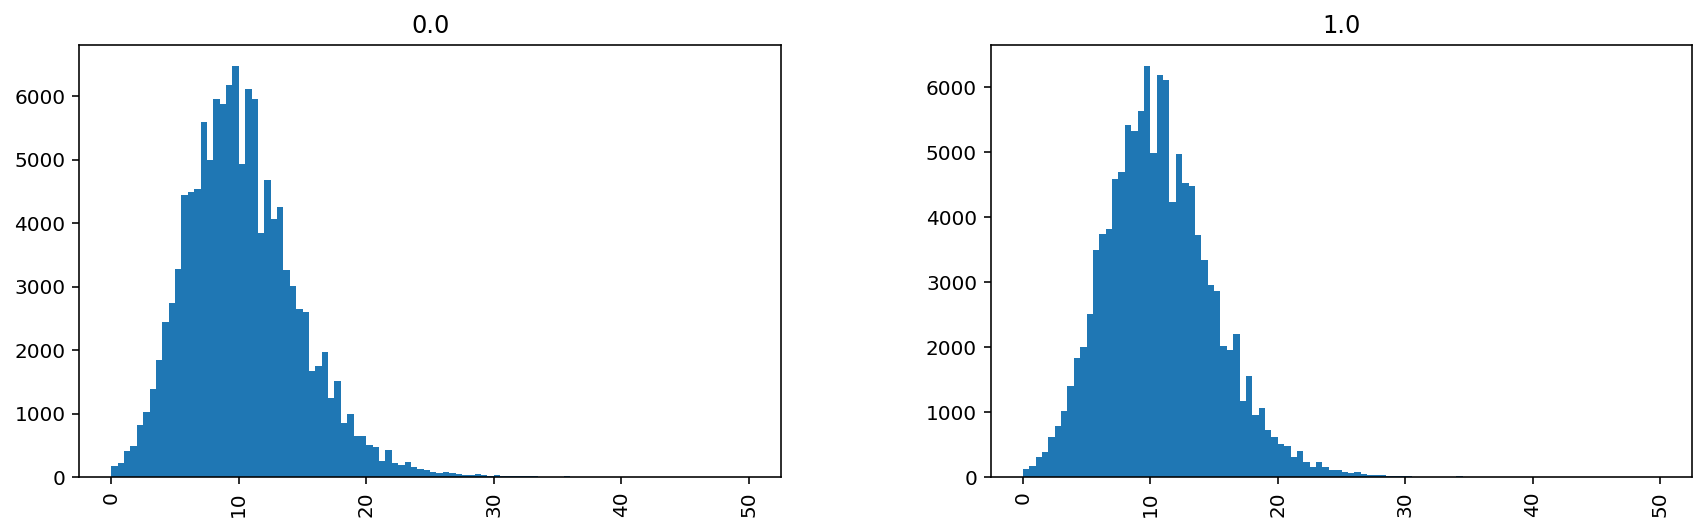

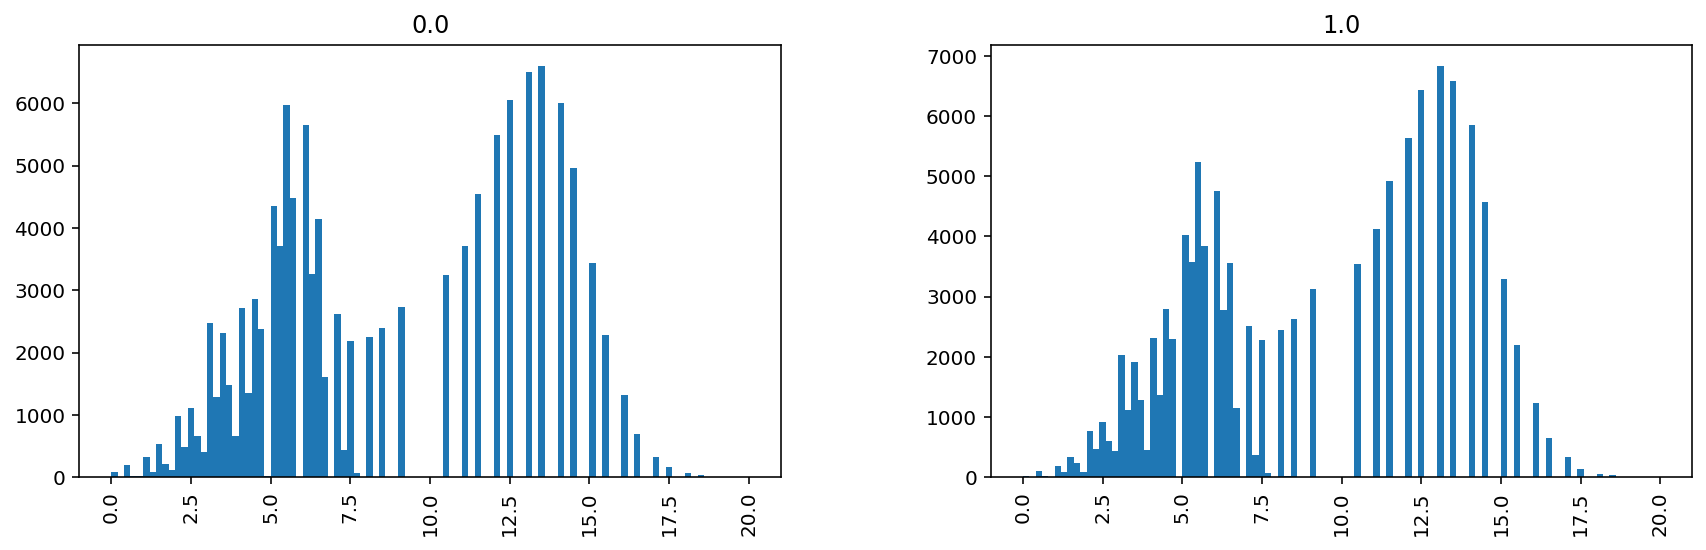

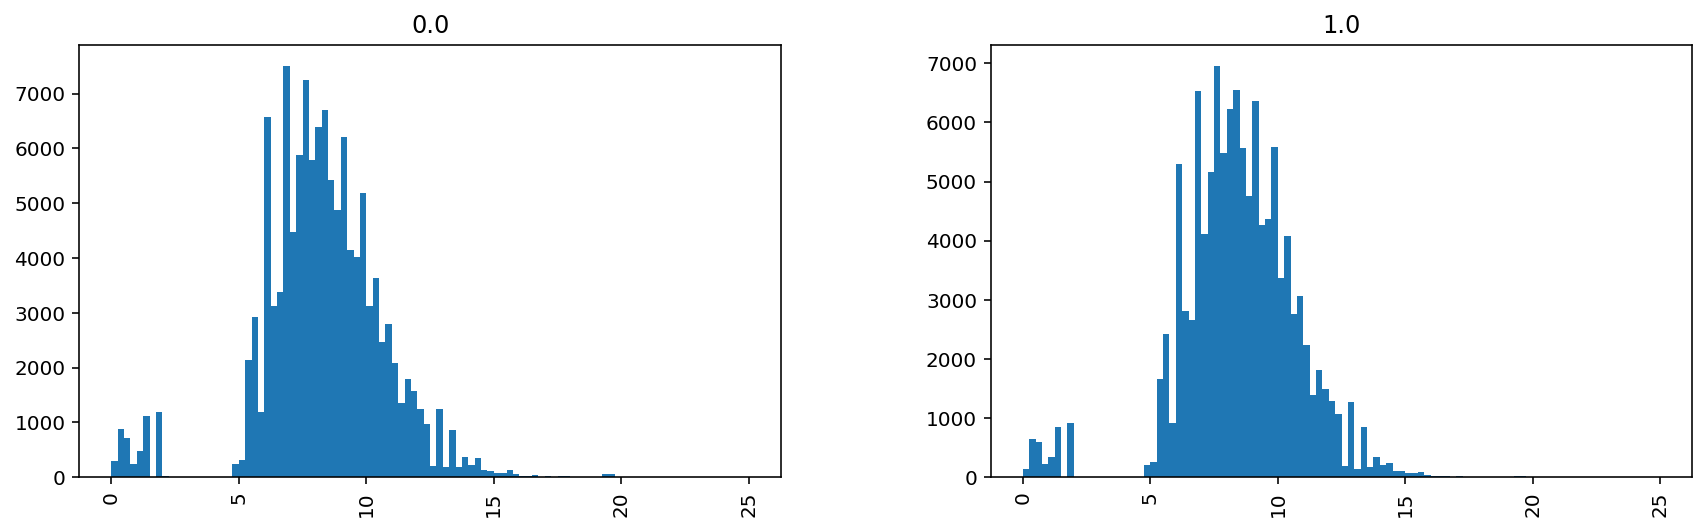

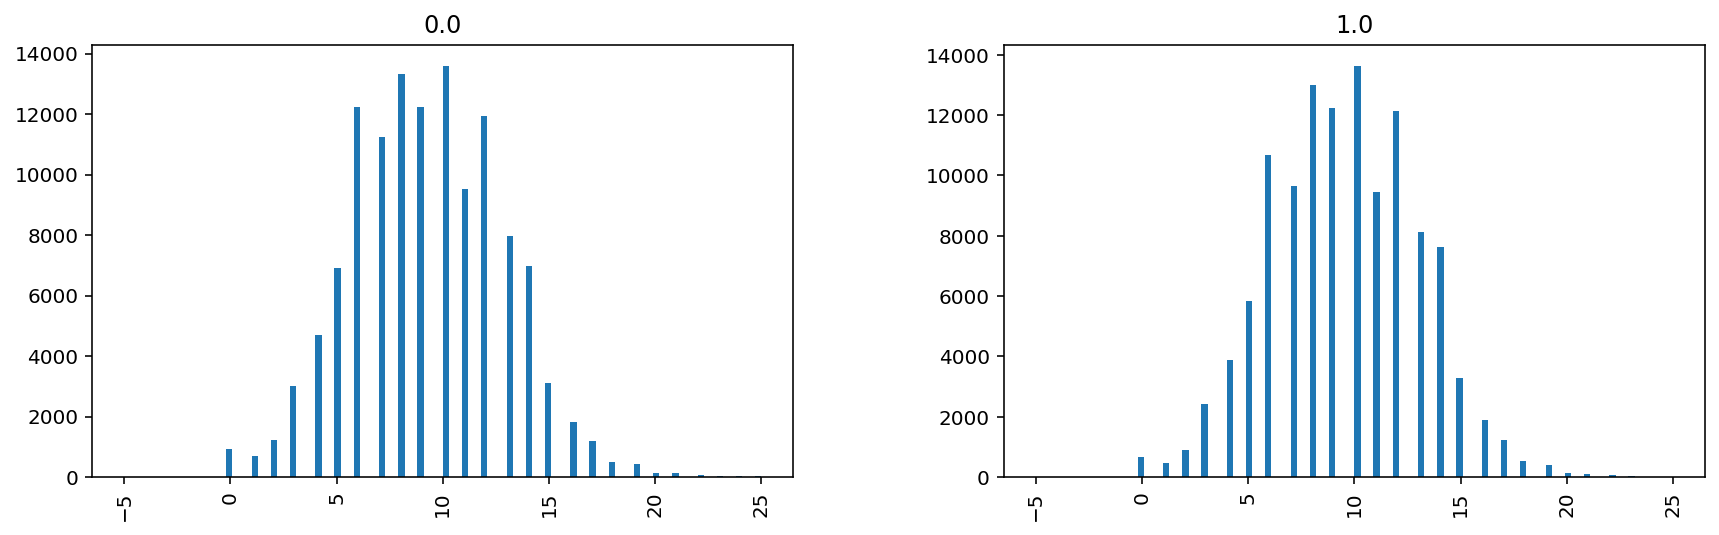

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
df_joined.hist(column='flesch readability', by='state', bins=100,figsize=(14,4), range=(-20.0,125.0))
df_joined.hist(column='FK grade',by='state',bins=100,figsize=(14,4), range=(-5.0,25.0))
df_joined.hist(column='fog',by='state',bins=100,figsize=(14,4), range=(0.0,25.0))
df_joined.hist(column='smog',by='state',bins=100,figsize=(14,4), range=(0.0,1.0))
df_joined.hist(column='automated readability',by='state',bins=100,figsize=(14,4), range=(-5.0,25.0))
df_joined.hist(column='CL index',by='state',bins=100,figsize=(14,4), range=(0.0,50.0))
df_joined.hist(column='linsear write',by='state',bins=100,figsize=(14,4), range=(0.0,20.0))
df_joined.hist(column='DC readability',by='state',bins=100,figsize=(14,4), range=(0.0,25.0))
df_joined.hist(column='grade consensus',by='state',bins=100,figsize=(14,4), range=(-5.0,25.0))

In [9]:
from scipy.stats import ttest_ind

column_list = ['flesch readability',
               'FK grade',
               'fog',
               'smog',
               'automated readability',
               'CL index',
               'linsear write',
               'DC readability',
               'grade consensus']
# create an empty dictionary
t_test_results = {}
# loop over column_list and execute code explained above
for column in column_list:
    print(column)
    group1 = df_joined.where(df_joined.state== 0).dropna()[column]
    group2 = df_joined.where(df_joined.state== 1).dropna()[column]
    # add the output to the dictionary 
    t_test_results[column] = ttest_ind(group1,group2)
results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
results_df.columns = ['statistic','pvalue']

flesch readability
(124115,) (118515,)
FK grade
(124115,) (118515,)
fog
(124115,) (118515,)
smog
(124115,) (118515,)
automated readability
(124115,) (118515,)
CL index
(124115,) (118515,)
linsear write
(124115,) (118515,)
DC readability
(124115,) (118515,)
grade consensus
(124115,) (118515,)


In [10]:
results_df

,statistic,pvalue
flesch readability,11.413228,3.655774e-30
FK grade,-12.965072,1.988176e-38
fog,-13.742842,5.835136e-43
smog,6.618103,3.645893e-11
automated readability,-21.505801,1.713866e-102
CL index,-20.666606,8.358438e-95
linsear write,-15.215457,2.952498e-52
DC readability,-18.438351,7.290844e-76
grade consensus,-17.979441,3.145970e-72
